# **My First Quantum Project Using Qiskit**

**Step - 1: Install Qiskit & Check Installation**

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
import qiskit
print("Qiskit installed successfully!")
print("Qiskit version:", qiskit.__version__)

Qiskit installed successfully!
Qiskit version: 2.1.2


**Step - 2: Install Qiskit Simulator & Check Installation**

In [ ]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 57.5 MB/s eta 0:00:00


In [ ]:
import qiskit
from qiskit_aer import Aer

print("Qiskit version:", qiskit.__version__)
print("Aer backends available:", Aer.backends())

Qiskit version: 2.1.2
Aer backends available: [AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


**Step - 3: Import Files from Qiskit**

In [ ]:
from qiskit import QuantumCircuit

**Step - 4: Create a 1-qubit quantum circuit & Define Various Gates**

In [ ]:
qc = QuantumCircuit(1)

qc.x(0)   # Pauli-X gate (NOT gate)
qc.h(0)   # Hadamard gate
qc.z(0)   # Pauli-Z gate

**Step - 5: Install Pylatexenc & Draw Gates**

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=7ce073e83401f43b283fe96e5cab3638176ca9b03708b09767267bff380d6aff
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


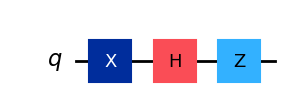

In [ ]:
qc.draw("mpl")

A single-qubit circuit applying X → H → Z in sequence.

**Step - 6: Draw CNOT Circuit with Two Qubit**

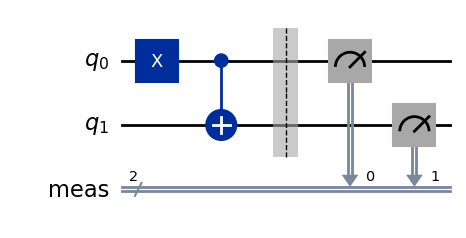

In [ ]:
from qiskit import QuantumCircuit

# 2-qubit circuit
qc2 = QuantumCircuit(2)

qc2.x(0)         # Apply X to qubit 0 (control qubit)
qc2.cx(0, 1)     # Apply CNOT (control=0, target=1)

qc2.measure_all()

qc2.draw("mpl")


The CNOT circuit:

Qubit q0 (top wire) is flipped with X → it becomes |1⟩.

Then CNOT flips q1 because the control (q0) = 1.

Both are measured → final state should be |11⟩ almost always.

**Step - 7: Simulate the CNOT Circuit**

CNOT Circuit Results: {'11': 1000}


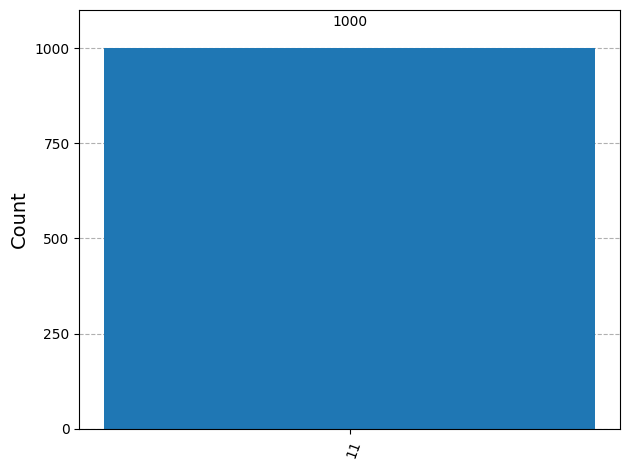

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Simulator
sim = AerSimulator()

# Transpile and run
tqc2 = transpile(qc2, sim)
result2 = sim.run(tqc2, shots=1000).result()
counts2 = result2.get_counts()

print("CNOT Circuit Results:", counts2)
plot_histogram(counts2)


The histogram shows 100% probability for '11'.

**Step - 7 Bell State Circuit**

The Bell state is created by putting the first qubit into superposition (with H) and then entangling it with the second qubit (with CNOT).

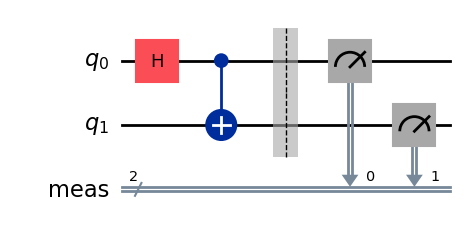

In [ ]:
from qiskit import QuantumCircuit

# 2-qubit Bell state circuit
bell = QuantumCircuit(2)

bell.h(0)        # Put q0 into superposition
bell.cx(0, 1)    # Entangle q0 with q1
bell.measure_all()

bell.draw("mpl")

**Step - 8 Simulate Bell State**

Expected output: roughly 50% |00⟩ and 50% |11⟩,

Bell State Results: {'00': 477, '11': 523}


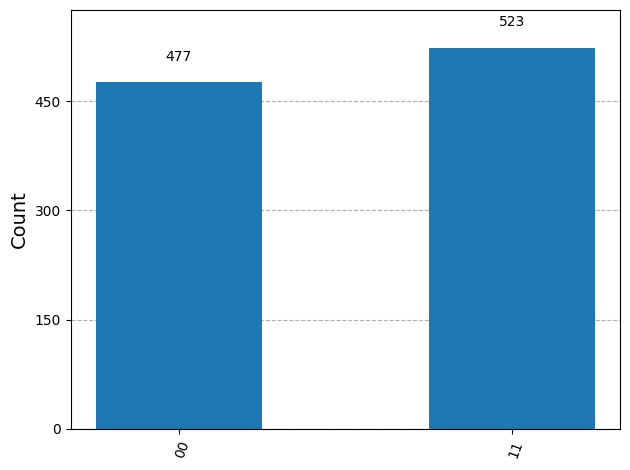

In [ ]:
# Transpile and run
tbell = transpile(bell, sim)
result_bell = sim.run(tbell, shots=1000).result()
counts_bell = result_bell.get_counts()

print("Bell State Results:", counts_bell)
plot_histogram(counts_bell)

END OF PROJECT